# 07wk-032: 아이스크림(교호작용) / 의사결정나무

최규빈  
2023-10-17

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-xIhMfXInEIhFMvFPXeM3Tg&si=PFDKhFupDaWnuVsW>

# 2. Imports

In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.linear_model 
import sklearn.tree

# 3. Data

In [11]:
np.random.seed(43052)
temp = pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv').iloc[:,3].to_numpy()[:100]
temp.sort()
choco = 40 + temp * 2.0 + np.random.randn(100)*3
vanilla = 60 + temp * 5.0 + np.random.randn(100)*3
df1 = pd.DataFrame({'temp':temp,'sales':choco}).assign(type='choco')
df2 = pd.DataFrame({'temp':temp,'sales':vanilla}).assign(type='vanilla')
df_train = pd.concat([df1,df2])
df_train

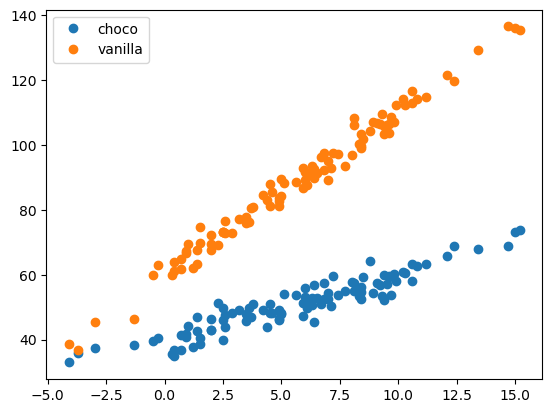

In [12]:
plt.plot(df_train.temp[df_train.type=='choco'],df_train.sales[df_train.type=='choco'],'o',label='choco')
plt.plot(df_train.temp[df_train.type=='vanilla'],df_train.sales[df_train.type=='vanilla'],'o',label='vanilla')
plt.legend()

# 5. 분석

`-` 분석1: 선형회귀

In [13]:
# step1
X = pd.get_dummies(df_train[['temp','type']],drop_first=True)
y = df_train['sales']
# step2 
predictr = sklearn.linear_model.LinearRegression()
# step3
predictr.fit(X,y)
# step4 
df_train['sales_hat'] = predictr.predict(X)
#---#
f'train score = {predictr.score(X,y):.4f}'

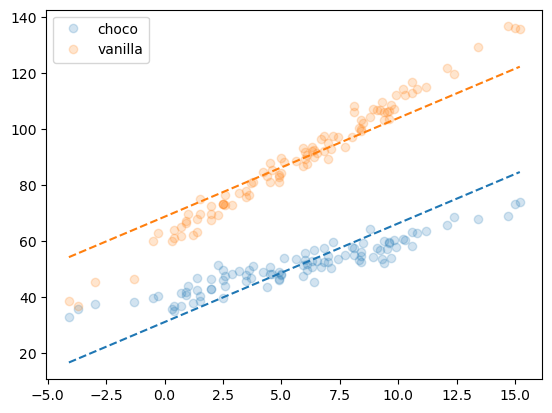

In [14]:
plt.plot(df_train.temp[df_train.type=='choco'],df_train.sales[df_train.type=='choco'],'o',alpha=0.2,label='choco')
plt.plot(df_train.temp[df_train.type=='choco'],df_train.sales_hat[df_train.type=='choco'],'--',color='C0')
plt.plot(df_train.temp[df_train.type=='vanilla'],df_train.sales[df_train.type=='vanilla'],'o',alpha=0.2,label='vanilla')
plt.plot(df_train.temp[df_train.type=='vanilla'],df_train.sales_hat[df_train.type=='vanilla'],'--',color='C1')
plt.legend()

`-` 분석2

In [15]:
# step1
X = pd.get_dummies(df_train[['temp','type']],drop_first=True)
y = df_train['sales']
# step2 
predictr = sklearn.tree.DecisionTreeRegressor()
# step3
predictr.fit(X,y)
# step4 
df_train['sales_hat'] = predictr.predict(X)
#---#
f'train score = {predictr.score(X,y):.4f}'

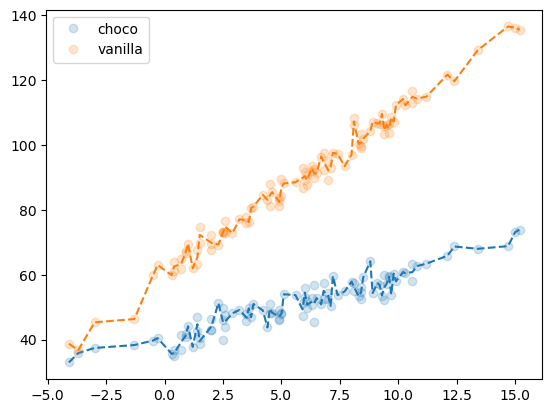

In [16]:
plt.plot(df_train.temp[df_train.type=='choco'],df_train.sales[df_train.type=='choco'],'o',alpha=0.2,label='choco')
plt.plot(df_train.temp[df_train.type=='choco'],df_train.sales_hat[df_train.type=='choco'],'--',color='C0')
plt.plot(df_train.temp[df_train.type=='vanilla'],df_train.sales[df_train.type=='vanilla'],'o',alpha=0.2,label='vanilla')
plt.plot(df_train.temp[df_train.type=='vanilla'],df_train.sales_hat[df_train.type=='vanilla'],'--',color='C1')
plt.legend()

`*` 오버피팅에 대한 제 개념: 통계에서 “관측치 = 언더라잉 + 랜덤” 으로 볼
수 있다. 모형이 설명해야할 영역은 “언더라잉” 이다. 만약에 모형이
언더라잉을 잘 설명하지 못한다면 언더피팅이고, 주어진 모형이 언더라잉을
넘어 오차항까지 설명하고 있다면 오버피팅이다.

1.  마음속의 underlying 을 간직한다 – 애매하죠?
2.  그 underlying 보다 잘 맞추면 오버피팅이다.
3.  내 마음속의 underlying 제대로 학습못하고 있다고 판단되면 모형미스
    혹은 언더피팅이다.

이러한 논리로 인하면 위의 의사결정나무로 적합된 결과는 오버피팅이다.
(그렇지만 언더피팅보단 나을지도?)